In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartdisease/Heart_Disease_Prediction.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
heart=pd.read_csv("/kaggle/input/heartdisease/Heart_Disease_Prediction.csv",parse_dates=True)

In [4]:
heart.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
heart.head(1)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence


In [7]:
heart["Heart Disease"]=heart["Heart Disease"].astype("category")
heart["Heart Disease_code"]=heart["Heart Disease"].cat.codes

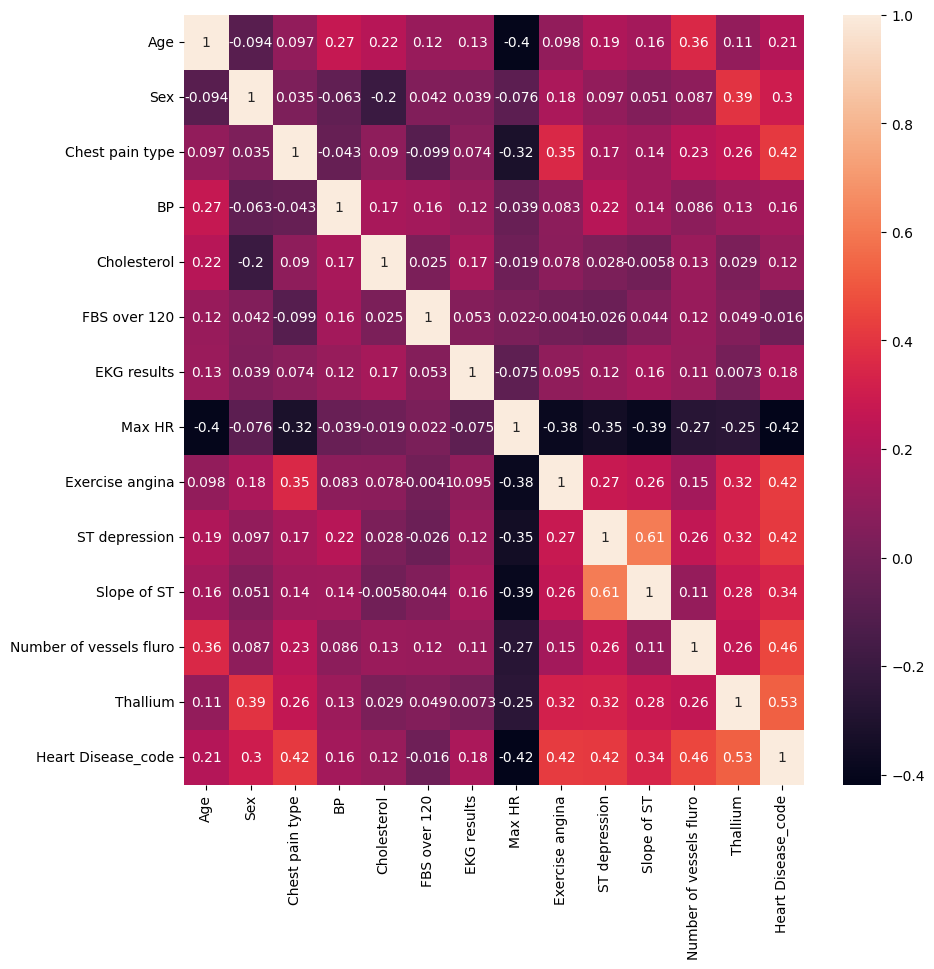

In [8]:
plt.figure(figsize=[10,10])
sns.heatmap(data=heart.corr(numeric_only=True),annot=True)
plt.show()

In [9]:
print(heart.columns)
print(heart["Chest pain type"].value_counts())
print(heart["FBS over 120"].value_counts())
print(heart["Exercise angina"].value_counts())
print(heart["Slope of ST"].value_counts())
print(heart["Number of vessels fluro"].value_counts())
print(heart["Thallium"].value_counts())
print(heart["Heart Disease"].value_counts())

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease',
       'Heart Disease_code'],
      dtype='object')
Chest pain type
4    129
3     79
2     42
1     20
Name: count, dtype: int64
FBS over 120
0    230
1     40
Name: count, dtype: int64
Exercise angina
0    181
1     89
Name: count, dtype: int64
Slope of ST
1    130
2    122
3     18
Name: count, dtype: int64
Number of vessels fluro
0    160
1     58
2     33
3     19
Name: count, dtype: int64
Thallium
3    152
7    104
6     14
Name: count, dtype: int64
Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64


In [10]:
heart["Sex"]=heart["Sex"].astype("category")
heart["Chest pain type"]=heart["Chest pain type"].astype("category")
heart["FBS over 120"]=heart["FBS over 120"].astype("category")
heart["Exercise angina"]=heart["Exercise angina"].astype("category")
heart["Slope of ST"]=heart["Slope of ST"].astype("category")
heart["Number of vessels fluro"]=heart["Number of vessels fluro"].astype("category")
heart["Thallium"]=heart["Thallium"].astype("category")
heart["Heart Disease"]=heart["Heart Disease"].astype("category")

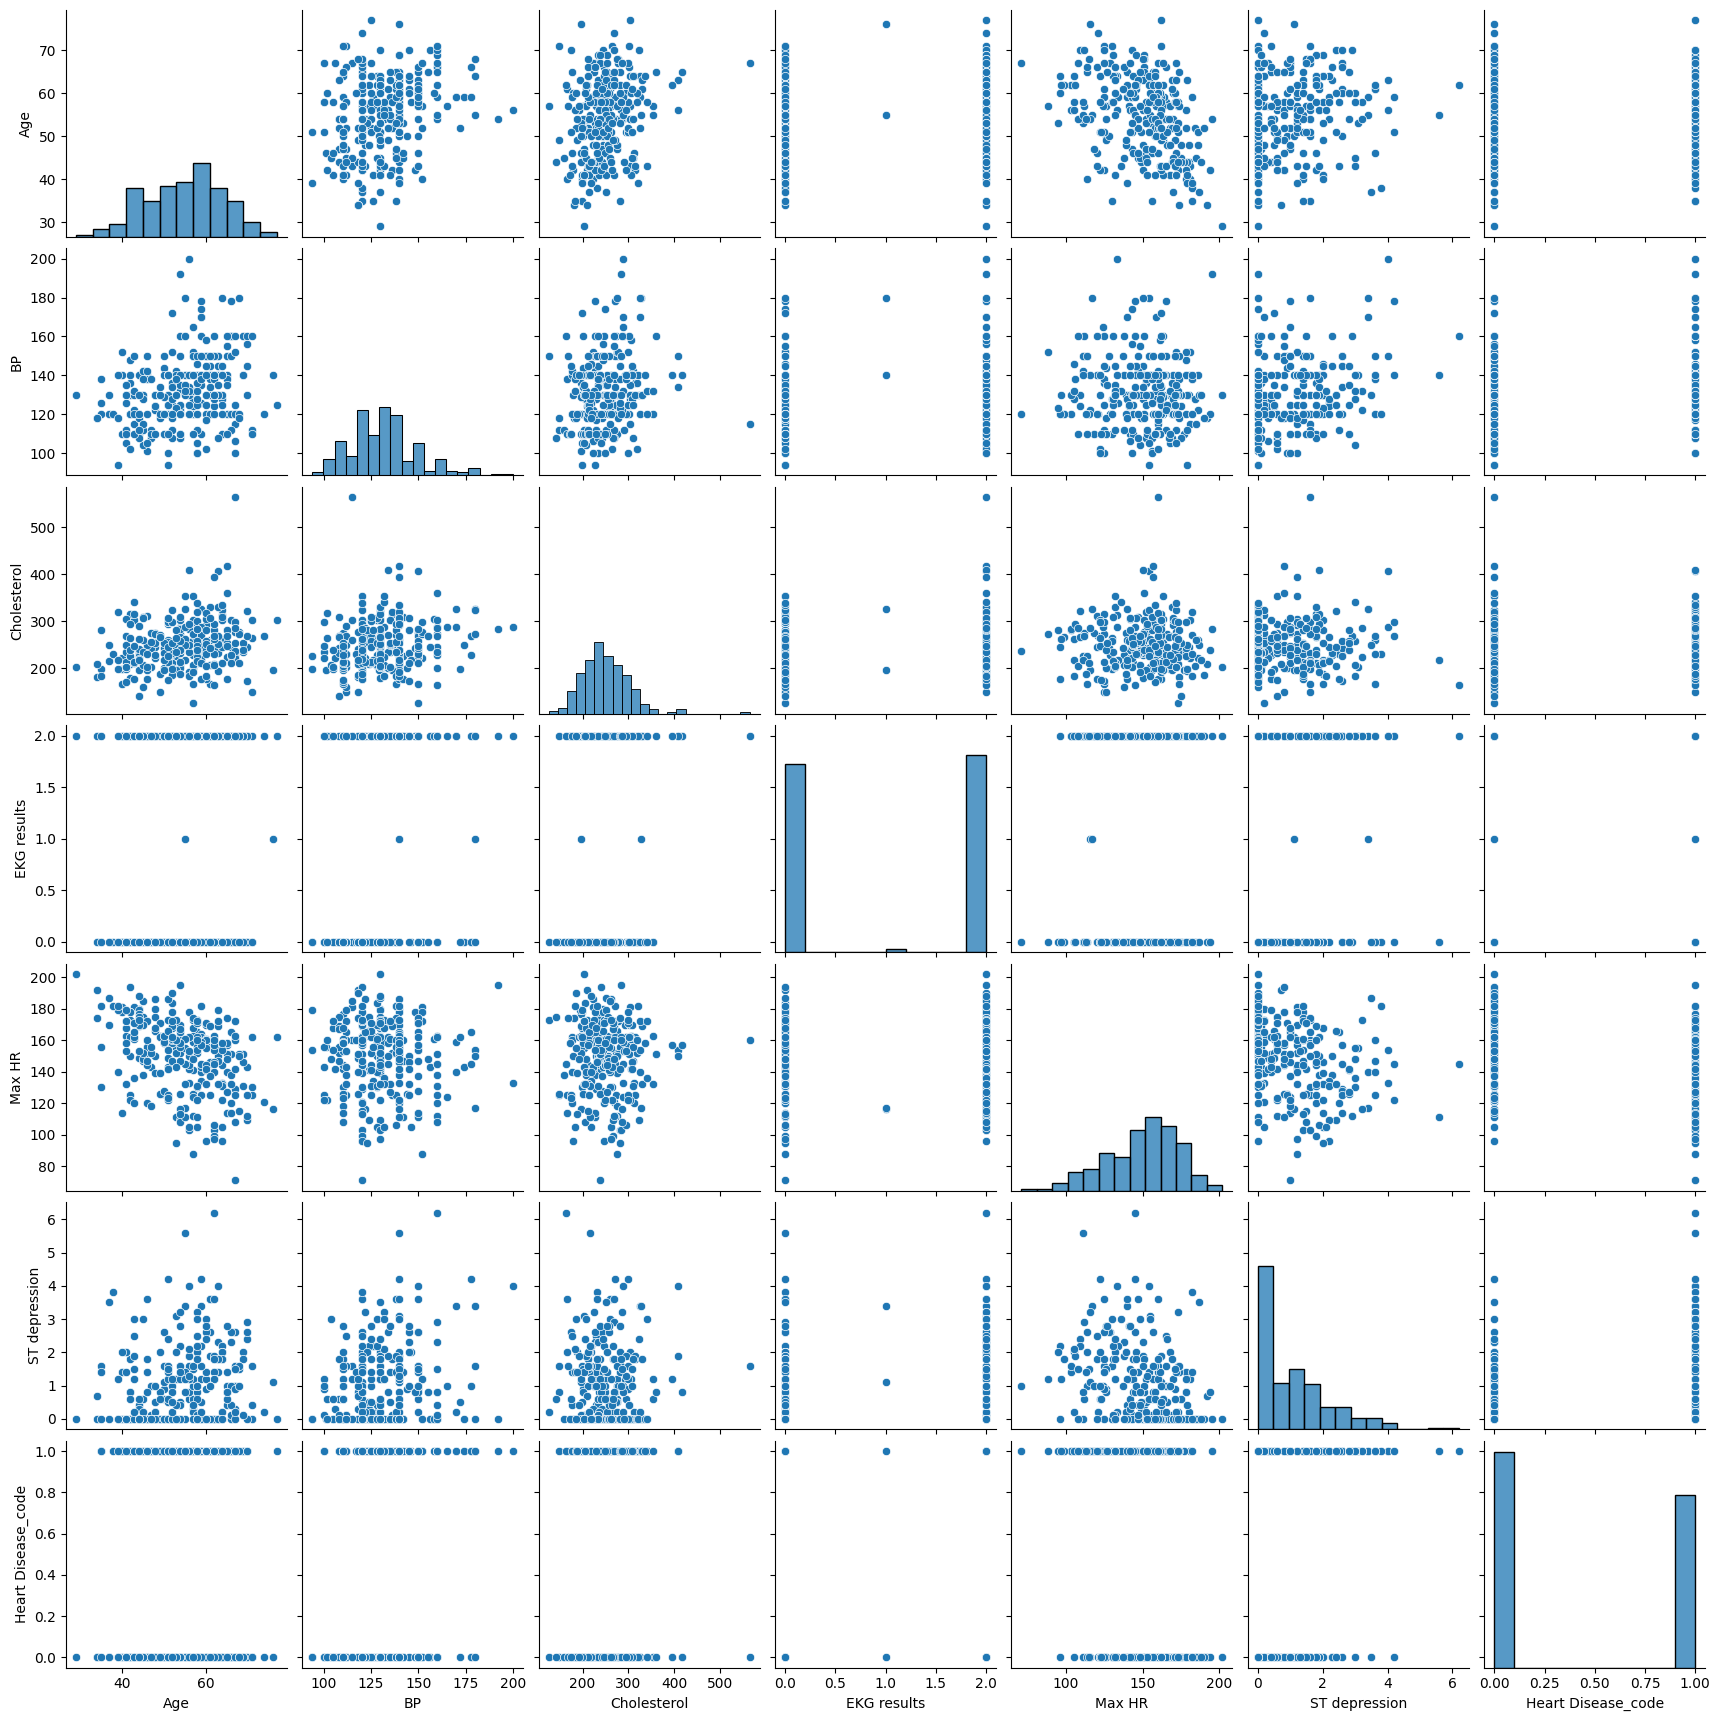

In [11]:
sns.pairplot(data=heart)
plt.show()

In [12]:
heart.head(1)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Heart Disease_code
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,1
